<a href="https://colab.research.google.com/github/chandhanadas/Data_science/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

In [ ]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
x_train=x_train/255
x_test=x_test/255

In [ ]:
x_train_flattened=x_train.reshape(len(x_train),28*28)
print(x_train_flattened.shape)
x_test_flattened=x_test.reshape(len(x_test),28*28)

(60000, 784)


In [ ]:
x_test_flattened=x_test.reshape(len(x_test),28*28)
model=keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
keras.layers.Dense(100,activation='relu'),
keras.layers.Dense(10,activation='sigmoid')])
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2705 - accuracy: 0.9230
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1242 - accuracy: 0.9639
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0872 - accuracy: 0.9736
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0658 - accuracy: 0.9803
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0524 - accuracy: 0.9840


In [ ]:
model.evaluate(x_test,y_test)
y_pred=model.predict(x_test)
print((np.argmax(y_pred[1])))

313/313 [==============================] - 0s 1ms/step
2


In [ ]:
y_pred_labels=[np.argmax(i) for i in y_pred]
print(y_pred_labels[:5])

[7, 2, 1, 0, 4]


In [ ]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)
plt.figure(figsize=(10,7))

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<function matplotlib.pyplot.show(*args, **kw)>

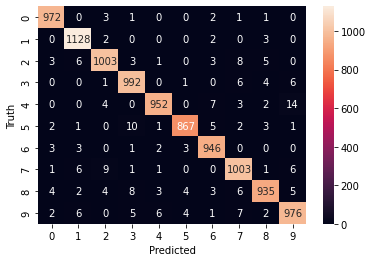

In [ ]:
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show